In [11]:
import numpy as np
from numpy.linalg import inv
import scipy.linalg as sp
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from math import ceil
import pandas as pd
import cmasher as cmr
from scipy.ndimage import gaussian_filter1d
from scipy.integrate import trapz
import h5py
from scipy.optimize import curve_fit
import ana_cont.continuation as cont
import contextlib
import io
import sys

sys.path.insert(0, "/home/simonedicataldo/Workspace/tools")
from ipynb.fs.full.DMFT_tools import Hamiltonian, get_Bandstructure, plot_DMFT_convergence
from ipynb.fs.full.DMFT_tools import w2dyn, plot_object, S_iw_adjust, cut_matsubara
from ipynb.fs.full.DMFT_tools import real_to_bloch, get_Hk, return_band_occupations
%matplotlib inline
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

In [12]:
num_ineq = 2
beta = 39

In [6]:
DMFT_STEP1 = w2dyn(_num_iter = 20, beta = beta, _num_ineq = num_ineq)
DMFT_STEP2 = w2dyn(_num_iter = 10, beta = beta, _num_ineq = num_ineq)
DMFT_STEP3 = w2dyn(_num_iter = 1,  beta = beta, _num_ineq = num_ineq)
DMFT_STEP1.get_results("./DMFT_STEP1.hdf5")
DMFT_STEP2.get_results("./DMFT_STEP2.hdf5")
DMFT_STEP3.get_results("./DMFT_result.hdf5")
dos_dft = np.genfromtxt('./Pr82Sr18NiO2_dft_dos.dat' )

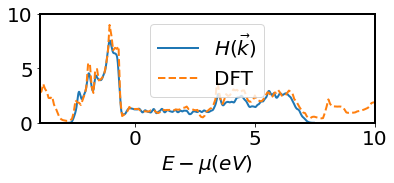

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(6,2))
Ef = np.mean(DMFT_STEP1.mu)
Ef_dft = 6.433238
axs.plot(DMFT_STEP1.w_dos-Ef_dft, DMFT_STEP1.lda_dos, linewidth=2, label=r"$H(\vec{k})$")
axs.plot(dos_dft[:,0]-Ef_dft, dos_dft[:,1], linewidth=2, label="DFT", linestyle="dashed")
axs.set_xlim([-4,10])
axs.set_xlabel(r"$E-\mu (eV)$")
axs.set_ylim(0, 10)

axs.legend()
plt.show()

Ineq. atom num.  0 has the following occupations: 
1 :    1.813868156385482
2 :    1.9347146397609059
3 :    1.9345824297477654
4 :    0.8377004111946638
5 :    1.9741336550985749
Total:    8.494999292187392
Ineq. atom num.  1 has the following occupations: 
1 :    0.11234947129282935
2 :    0.008969445178138944
3 :    0.008990070458900845
4 :    0.014606389135494158
5 :    0.1805013817471368
Total:    0.3254167578125001


/home/simonedicataldo/Workspace/tools/DMFT_tools.ipynb:67: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "            axs[0][0].set_ylabel(\"$\\mu (eV)$\")\n",


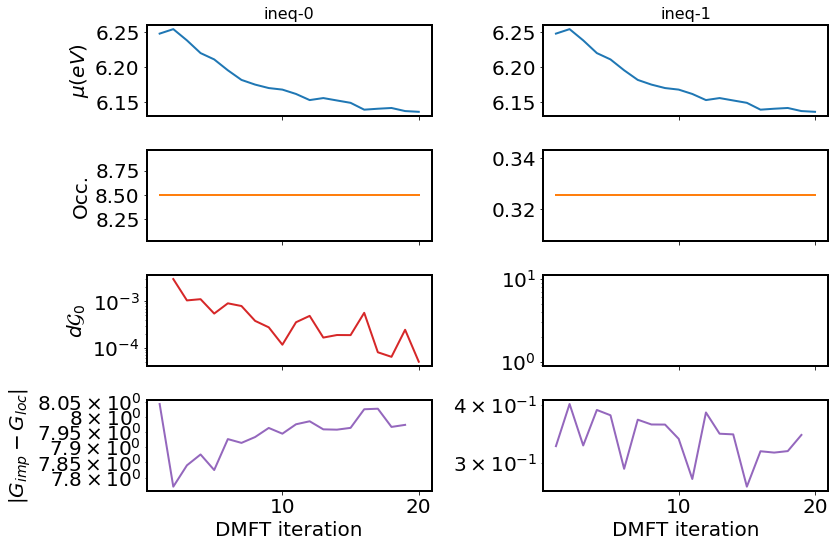

(<Figure size 864x576 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'ineq-0'}, ylabel='$\\mu (eV)$'>,
         <AxesSubplot: title={'center': 'ineq-1'}>],
        [<AxesSubplot: ylabel='Occ.'>, <AxesSubplot: >],
        [<AxesSubplot: ylabel='$d\\mathcal{G}_0$'>, <AxesSubplot: >],
        [<AxesSubplot: xlabel='DMFT iteration', ylabel='$|G_{imp}-G_{loc}$|'>,
         <AxesSubplot: xlabel='DMFT iteration'>]], dtype=object))

In [13]:
return_band_occupations(DMFT_STEP1, num_ineq = num_ineq)
plot_DMFT_convergence(DMFT_STEP1, num_ineq = num_ineq)

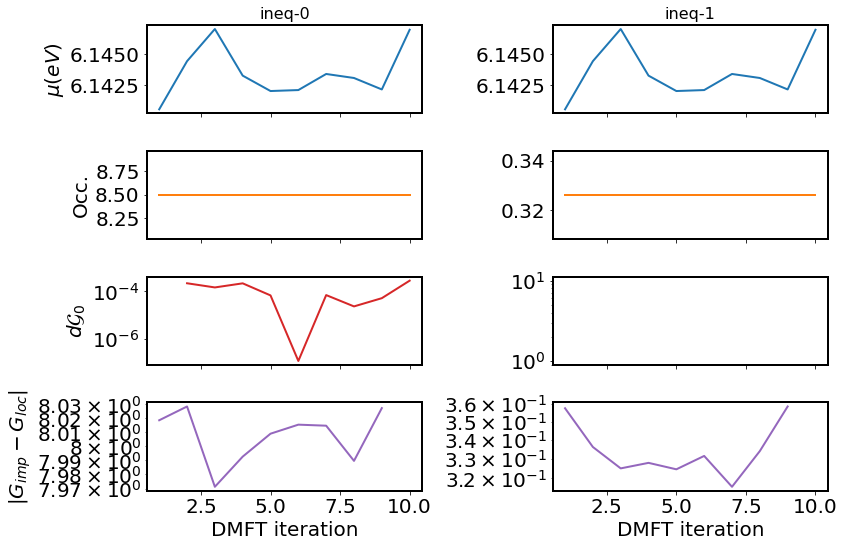

(<Figure size 864x576 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'ineq-0'}, ylabel='$\\mu (eV)$'>,
         <AxesSubplot: title={'center': 'ineq-1'}>],
        [<AxesSubplot: ylabel='Occ.'>, <AxesSubplot: >],
        [<AxesSubplot: ylabel='$d\\mathcal{G}_0$'>, <AxesSubplot: >],
        [<AxesSubplot: xlabel='DMFT iteration', ylabel='$|G_{imp}-G_{loc}$|'>,
         <AxesSubplot: xlabel='DMFT iteration'>]], dtype=object))

In [14]:
plot_DMFT_convergence(DMFT_STEP2, num_ineq = num_ineq)